In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pandas as pd
# 
fnCSVResTanh='results-all-in-one-Tanh.csv'
fnCSVResreLU='results-all-in-one-ReLU.csv'

In [49]:
dataTanh=pd.read_csv(fnCSVResTanh)
dataReLU=pd.read_csv(fnCSVResTanh)

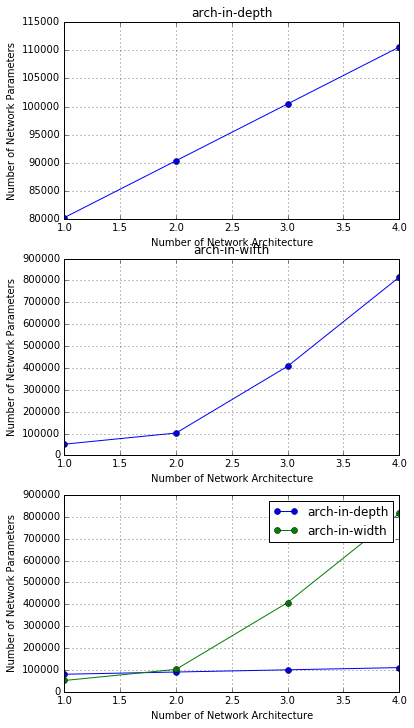

In [45]:
datay1=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
datay2=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
datax=range(1,len(datay1)+1)

plt.figure(figsize=(6,12))
plt.subplot(3,1,1)
plt.plot(datax,datay1,'o-')
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.title('arch-in-depth')
#
plt.subplot(3,1,2)
plt.plot(datax,datay2,'o-')
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.title('arch-in-wifth')
#
plt.subplot(3,1,3)
plt.hold(True)
plt.plot(datax,datay1,'o-')
plt.plot(datax,datay2,'o-')
plt.hold(False)
plt.grid(True)
plt.xlabel('Number of Network Architecture')
plt.ylabel('Number of Network Parameters')
plt.legend(['arch-in-depth', 'arch-in-width'])
plt.show()

In [66]:
dataReLU_InDepth=dataReLU[dataReLU['archType']==1]
dataTanh_InDepth=dataTanh[dataReLU['archType']==1]
dataReLU_InWidth=dataReLU[dataReLU['archType']==2]
dataTanh_InWidth=dataTanh[dataReLU['archType']==2]
#
arrNumP_InDepth=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
arrNumP_InWidth=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numP']
#
arrNumN_InWidth=dataReLU[ (dataReLU['archType']==2) & (dataReLU['Model']=='Keras') & (dataReLU['numEpoch']==1)]['numN']
arrNumEpoch=dataReLU[ (dataReLU['archType']==1) & (dataReLU['Model']=='Keras') & (dataReLU['numL']==1)]['numEpoch']
#
arrFrmNames=dataTanh['Model'].unique()

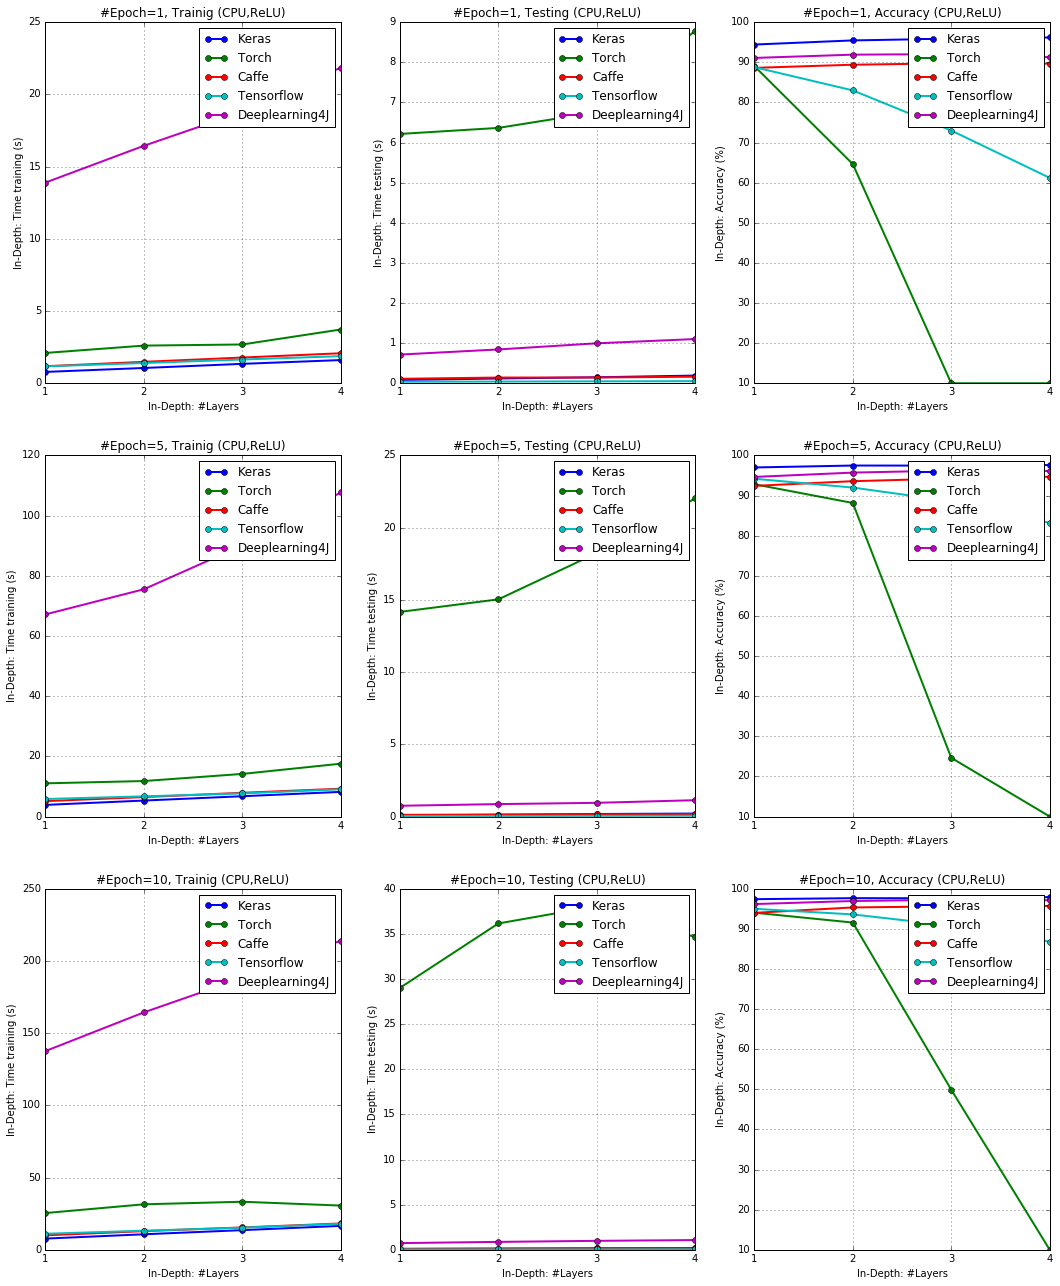

In [106]:
# Time&ACC from numL
# (1) Select nonlinear function, and draw plots
# nonlinFun='Tanh'
nonlinFun='ReLU'
numNumEpoch=len(arrNumEpoch)
plt.figure(figsize=(18,22))
for ei,numEpoch in enumerate(arrNumEpoch):
    lstLegend=[]
    lstData=[]
    for i,ii in enumerate(arrFrmNames):
        if nonlinFun=='Tanh':
            tmpData=dataTanh_InDepth[ (dataTanh_InDepth['Model']==ii)&(dataTanh_InDepth['numEpoch']==numEpoch)]
            tmpData2=tmpData[['numL','timeTrainMean','timeTestMean','accMean']].as_matrix().T
        else:
            tmpData=dataReLU_InDepth[ (dataReLU_InDepth['Model']==ii)&(dataReLU_InDepth['numEpoch']==numEpoch)]
            tmpData2=tmpData[['numL','timeTrainMean','timeTestMean','accMean']].as_matrix().T
        lstLegend.append(ii)
        lstData.append(tmpData2)
    #
    plt.subplot(numNumEpoch,3,numNumEpoch*ei+1)
    plt.hold(True)
    for tt in lstData:
        plt.plot(tt[0,:], tt[1,:],'-o',linewidth=2.0)
    plt.xticks(tt[0,:].astype(np.int))
    plt.legend(lstLegend)
    plt.hold(False)
    plt.xlabel('In-Depth: #Layers')
    plt.ylabel('In-Depth: Time training (s)')
    plt.grid(True)
    plt.title("#Epoch=%d, Trainig (CPU,%s)" % (numEpoch,nonlinFun))
    #
    plt.subplot(numNumEpoch,3,numNumEpoch*ei+2)
    plt.hold(True)
    for tt in lstData:
        plt.plot(tt[0,:], tt[2,:],'-o',linewidth=2.0)
    plt.xticks(tt[0,:].astype(np.int))
    plt.legend(lstLegend)
    plt.hold(False)
    plt.xlabel('In-Depth: #Layers')
    plt.ylabel('In-Depth: Time testing (s)')
    plt.grid(True)
    plt.title("#Epoch=%d, Testing (CPU,%s)" % (numEpoch,nonlinFun))
    #
    plt.subplot(numNumEpoch,3,numNumEpoch*ei+3)
    plt.hold(True)
    for tt in lstData:
        plt.plot(tt[0,:], 100.*tt[3,:],'-o',linewidth=2.0)
    plt.xticks(tt[0,:].astype(np.int))
    plt.legend(lstLegend)
    plt.hold(False)
    plt.xlabel('In-Depth: #Layers')
    plt.ylabel('In-Depth: Accuracy (%)')
    plt.grid(True)
    plt.title("#Epoch=%d, Accuracy (CPU,%s)" % (numEpoch,nonlinFun))

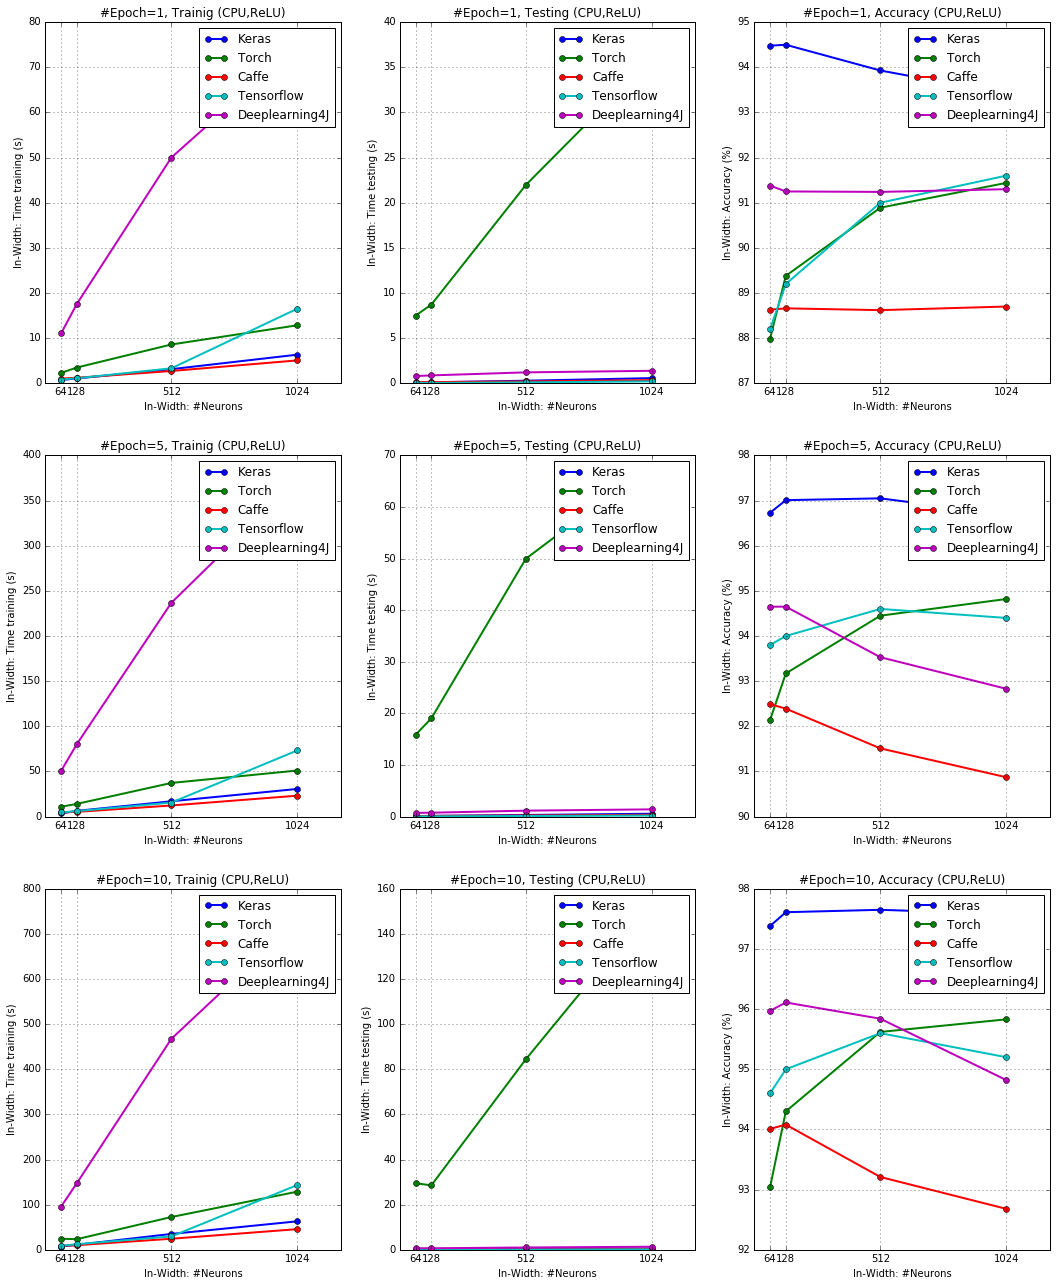

In [109]:
# Time&ACC from numN
# (1) Select nonlinear function, and draw plots
# nonlinFun='Tanh'
nonlinFun='ReLU'
numNumEpoch=len(arrNumEpoch)
plt.figure(figsize=(18,22))
for ei,numEpoch in enumerate(arrNumEpoch):
    lstLegend=[]
    lstData=[]
    for i,ii in enumerate(arrFrmNames):
        if nonlinFun=='Tanh':
            tmpData=dataTanh_InWidth[ (dataTanh_InWidth['Model']==ii)&(dataTanh_InWidth['numEpoch']==numEpoch)]
            tmpData2=tmpData[['numN','timeTrainMean','timeTestMean','accMean']].as_matrix().T
        else:
            tmpData=dataReLU_InWidth[ (dataReLU_InWidth['Model']==ii)&(dataReLU_InWidth['numEpoch']==numEpoch)]
            tmpData2=tmpData[['numN','timeTrainMean','timeTestMean','accMean']].as_matrix().T
        lstLegend.append(ii)
        lstData.append(tmpData2)
    #
    plt.subplot(numNumEpoch,3,numNumEpoch*ei+1)
    plt.hold(True)
    for tt in lstData:
        plt.plot(tt[0,:], tt[1,:],'-o',linewidth=2.0)
    plt.xticks(tt[0,:].astype(np.int))
    plt.legend(lstLegend)
    plt.hold(False)
    plt.xlabel('In-Width: #Neurons')
    plt.ylabel('In-Width: Time training (s)')
    plt.grid(True)
    plt.title("#Epoch=%d, Trainig (CPU,%s)" % (numEpoch,nonlinFun))
    #
    plt.subplot(numNumEpoch,3,numNumEpoch*ei+2)
    plt.hold(True)
    for tt in lstData:
        plt.plot(tt[0,:], tt[2,:],'-o',linewidth=2.0)
    plt.xticks(tt[0,:].astype(np.int))
    plt.legend(lstLegend)
    plt.hold(False)
    plt.xlabel('In-Width: #Neurons')
    plt.ylabel('In-Width: Time testing (s)')
    plt.grid(True)
    plt.title("#Epoch=%d, Testing (CPU,%s)" % (numEpoch,nonlinFun))
    #
    plt.subplot(numNumEpoch,3,numNumEpoch*ei+3)
    plt.hold(True)
    for tt in lstData:
        plt.plot(tt[0,:], 100.*tt[3,:],'-o',linewidth=2.0)
    plt.xticks(tt[0,:].astype(np.int))
    plt.legend(lstLegend)
    plt.hold(False)
    plt.xlabel('In-Width: #Neurons')
    plt.ylabel('In-Width: Accuracy (%)')
    plt.grid(True)
    plt.title("#Epoch=%d, Accuracy (CPU,%s)" % (numEpoch,nonlinFun))

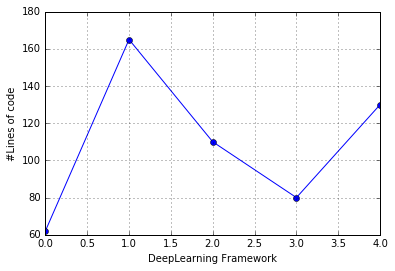

In [112]:
arrFrmNames
arrCodeLineNum=[62,165,110,80,130]
plt.figure()
plt.plot(arrCodeLineNum, '-o')
plt.xlabel('DeepLearning Framework')
plt.ylabel('#Lines of code')
plt.yticks(arrFrmNames)
plt.grid(True)